In [2]:
from pysgx import stocks, info, util
import importlib
import pandas as pd

In [23]:
importlib.reload(info);

In [16]:
df = pd.DataFrame.from_dict(info.get_active(), orient='index').reset_index()
df.columns = ['Ticker', 'MarketCap']

In [ ]:
df = util.to_df(info.get_all_with_mc(), ['Ticker', 'MarketCap'])
plt = df[df.MarketCap<100000000].MarketCap.plot.hist(bins=50, alpha=0.5, title='SGX Stock Market Cap Distribution - Below(100M SGD)')
plt.set_xlabel("Market Cap (100M)")
plt.get_figure().savefig('mc_100M.png')

In [7]:
df = util.to_df(info.get_all_avg_vol(), ['Ticker', 'AvergeVolume'])
df.AvergeVolume = df.AvergeVolume / 10000

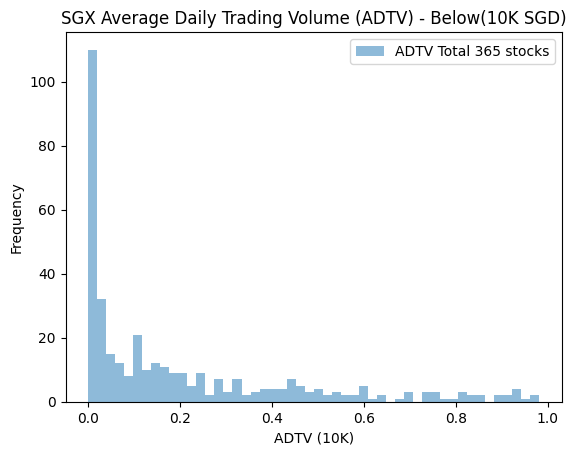

In [70]:
plt = df[df.AvergeVolume<=1].plot.hist(bins=50, alpha=0.5, title='SGX Average Daily Trading Volume (ADTV) - Below(10K SGD)')
plt.set_xlabel("ADTV (10K)")
plt.legend(['ADTV Total 365 stocks'])
plt.get_figure().savefig('adtv_10K.png')

C:\Users\wuvis\AppData\Local\Temp\ipykernel_1988\117339977.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt = df[1<df.AvergeVolume][df.AvergeVolume<30].plot.hist(bins=50, alpha=0.5, title='SGX Average Daily Trading Volume (ADTV) 10K~300K SGD')


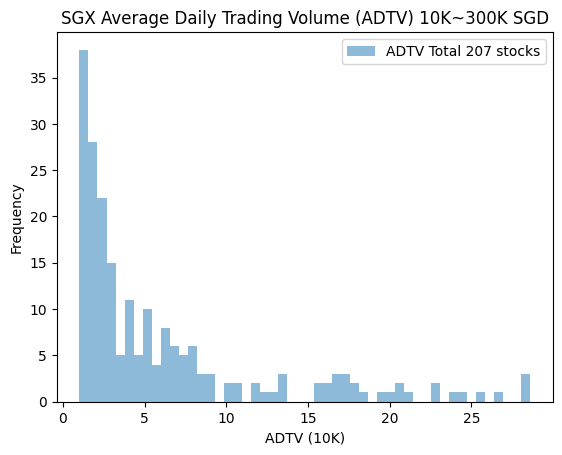

In [65]:
plt = df[1<df.AvergeVolume][df.AvergeVolume<=30].plot.hist(bins=50, alpha=0.5, title='SGX Average Daily Trading Volume (ADTV) 10K~300K SGD')
plt.set_xlabel("ADTV (10K)")
plt.legend(['ADTV Total 207 stocks'])
plt.get_figure().savefig('adtv_10K_300K.png')

C:\Users\wuvis\AppData\Local\Temp\ipykernel_1988\3548758812.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt = df[df.AvergeVolume>30][df.AvergeVolume<=300].plot.hist(bins=50, alpha=0.5, title='SGX Average Daily Trading Volume (ADTV) 300K~3M SGD')


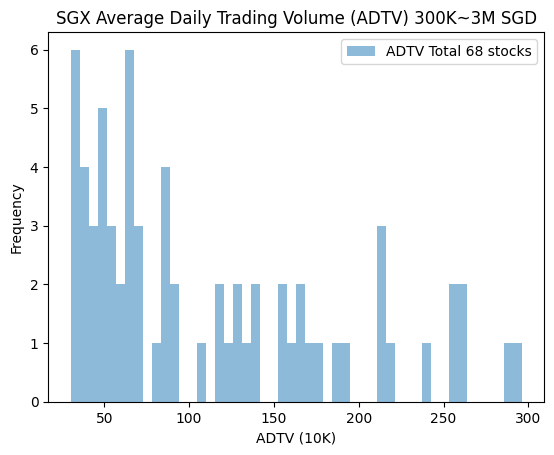

In [79]:
plt = df[df.AvergeVolume>30][df.AvergeVolume<=300].plot.hist(bins=50, alpha=0.5, title='SGX Average Daily Trading Volume (ADTV) 300K~3M SGD')
plt.set_xlabel("ADTV (10K)")
plt.legend(['ADTV Total 68 stocks'])
plt.get_figure().savefig('adtv_300K_3M.png')
# len(df[df.AvergeVolume>30][df.AvergeVolume<=300])

In [10]:
df[df.AvergeVolume>300].sort_values(by=['AvergeVolume']).to_csv("adtv_3M_plus.csv", index=False, float_format='%.6f')